# Исследование BigP3BCI и формирование выборки для SSL

## BigP3BCI: Исследуем данные на примере одной записи

In [1]:
import mne

In [9]:
raw = mne.io.read_raw_edf(r"C:\data_bigp3bci\bigP3BCI-data\StudyA\A_01\SE001\Test\CB\A_01_SE001_CB_Test06.edf", preload=True)
print(raw)
print(raw.ch_names)


Extracting EDF parameters from C:\data_bigp3bci\bigP3BCI-data\StudyA\A_01\SE001\Test\CB\A_01_SE001_CB_Test06.edf...
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 35207  =      0.000 ...   137.527 secs...
<RawEDF | A_01_SE001_CB_Test06.edf, 114 x 35208 (137.5 s), ~30.7 MiB, data loaded>
['EEG_F3', 'EEG_Fz', 'EEG_F4', 'EEG_T7', 'EEG_C3', 'EEG_Cz', 'EEG_C4', 'EEG_T8', 'EEG_CP3', 'EEG_CP4', 'EEG_P3', 'EEG_Pz', 'EEG_P4', 'EEG_PO7', 'EEG_PO8', 'EEG_Oz', 'EEG_FP1', 'EEG_FP2', 'EEG_F7', 'EEG_F8', 'EEG_FC5', 'EEG_FC1', 'EEG_FC2', 'EEG_FC6', 'EEG_CPz', 'EEG_P7', 'EEG_P5', 'EEG_PO3', 'EEG_POz', 'EEG_PO4', 'EEG_O1', 'EEG_O2', 'A_1_1', 'B_1_2', 'C_1_3', 'D_1_4', 'E_1_5', 'F_1_6', 'G_1_7', 'H_1_8', 'I_2_1', 'J_2_2', 'K_2_3', 'L_2_4', 'M_2_5', 'N_2_6', 'O_2_7', 'P_2_8', 'Q_3_1', 'R_3_2', 'S_3_3', 'T_3_4', 'U_3_5', 'V_3_6', 'W_3_7', 'X_3_8', 'Y_4_1', 'Z_4_2', 'Sp_4_3', '1_4_4', '2_4_5', '3_4_6', '4_4_7', '5_4_8', '6_5_1', '7_5_2', '8_5_3', '9_5_4', '0_5_5', 'Prd_5_6', 

C:\Users\Таисия\AppData\Local\Temp\ipykernel_20740\2610189235.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(r"C:\data_bigp3bci\bigP3BCI-data\StudyA\A_01\SE001\Test\CB\A_01_SE001_CB_Test06.edf", preload=True)
C:\Users\Таисия\AppData\Local\Temp\ipykernel_20740\2610189235.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(r"C:\data_bigp3bci\bigP3BCI-data\StudyA\A_01\SE001\Test\CB\A_01_SE001_CB_Test06.edf", preload=True)


In [4]:
print(raw.info)
print("Частота дискретизации (Hz):", raw.info["sfreq"])
print("Длительность (сек):", raw.n_times / raw.info["sfreq"])


<Info | 8 non-empty values
 bads: []
 ch_names: EEG_F3, EEG_Fz, EEG_F4, EEG_T7, EEG_C3, EEG_Cz, EEG_C4, EEG_T8, ...
 chs: 114 EEG
 custom_ref_applied: False
 highpass: 58.0 Hz
 lowpass: 62.0 Hz
 meas_date: 2020-01-01 00:00:00 UTC
 nchan: 114
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: A_01, sex: 0, first_name: X, last_name: X, birthday: 2020-01-01>
>
Частота дискретизации (Hz): 256.0000930697907
Длительность (сек): 137.5312


In [ ]:
import numpy as np

# =Вытащим сигналы StimulusBegin и StimulusType
stim_begin = raw.get_data(picks=['StimulusBegin'])[0]
stim_type  = raw.get_data(picks=['StimulusType'])[0]

print("stim_begin уникальные значения:", np.unique(stim_begin))
print("stim_type уникальные значения:", np.unique(stim_type))


stim_begin уникальные значения: [0. 1.]
stim_type уникальные значения: [0. 1.]


In [6]:
# индексы, где StimulusBegin подскакивает 0 -> 1
onsets = np.where(np.diff(stim_begin) == 1)[0] + 1
print("Кол-во предъявлений стимулов:", len(onsets))

# посмотрим первые 10
for i in range(10):
    idx = onsets[i]
    print(i, "индекс", idx, "тип", stim_type[idx])


Кол-во предъявлений стимулов: 840
0 индекс 1160 тип 0.0
1 индекс 1192 тип 0.0
2 индекс 1224 тип 0.0
3 индекс 1256 тип 1.0
4 индекс 1288 тип 0.0
5 индекс 1320 тип 0.0
6 индекс 1352 тип 0.0
7 индекс 1384 тип 0.0
8 индекс 1416 тип 0.0
9 индекс 1448 тип 0.0


In [8]:
import numpy as np

# все имена каналов
ch_names = raw.ch_names

# берём только ЭЭГ-каналы
eeg_picks = [i for i, ch in enumerate(ch_names) if ch.startswith("EEG_")]
print("Число EEG-каналов:", len(eeg_picks))
print("Первые EEG-каналы:", [ch_names[i][4:] for i in range(len(eeg_picks))])

# вытащим только EEG-данные (C x T)
eeg_data = raw.get_data(picks=eeg_picks)  # shape: (n_channels, n_times)
print("Форма eeg_data:", eeg_data.shape)


Число EEG-каналов: 32
Первые EEG-каналы: ['F3', 'Fz', 'F4', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP3', 'CP4', 'P3', 'Pz', 'P4', 'PO7', 'PO8', 'Oz', 'FP1', 'FP2', 'F7', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'CPz', 'P7', 'P5', 'PO3', 'POz', 'PO4', 'O1', 'O2']
Форма eeg_data: (32, 35208)


## Перчень электродов в каждом эксперименте

In [ ]:
# берём только ЭЭГ-каналы
paths = {'A' : r"C:\data_bigp3bci\bigP3BCI-data\StudyA\A_01\SE001\Test\CB\A_01_SE001_CB_Test06.edf",
         'B' : r'C:\data_bigp3bci\bigP3BCI-data\StudyB\B_01\SE001\Test\CB\B_01_SE001_CB_Test12.edf',
         'C' : r'C:\data_bigp3bci\bigP3BCI-data\StudyC\C_01\SE001\Test\CBERN\C_01_SE001_CBERN_Test05.edf',
         'D' : r'C:\data_bigp3bci\bigP3BCI-data\StudyD\D_01\SE001\Test\Dyn\D_01_SE001_Dyn_Test01.edf',
         'E' : r'C:\data_bigp3bci\bigP3BCI-data\StudyE\E_01\SE001\Test\CB\E_01_SE001_CB_Test01.edf',
         'F' : r'C:\data_bigp3bci\bigP3BCI-data\StudyF\F_03\SE001\Test\Dyn\F_03_SE001_Dyn_Test01.edf',
         'G' : r'C:\data_bigp3bci\bigP3BCI-data\StudyG\G_01\SE001\Test\DynBigram\G_01_SE001_DynBigram_Test01.edf',
         'H' : r'C:\data_bigp3bci\bigP3BCI-data\StudyH\H_01\SE001\Test\CBGaze01\H_01_SE001_CBGaze01_Test01.edf',
         'I' : r'C:\data_bigp3bci\bigP3BCI-data\StudyI\I_01\SE001\Test\CB\I_01_SE001_CB_Test01.edf',
         'J' : r'C:\data_bigp3bci\bigP3BCI-data\StudyJ\J_01\SE001\Test\PB\J_01_SE001_PB_Test01.edf',
         'K' : r'C:\data_bigp3bci\bigP3BCI-data\StudyK\K_01\SE001\Test\AD\K_01_SE001_AD_Test01.edf',
         'L' : r'C:\data_bigp3bci\bigP3BCI-data\StudyL\L_01\SE001\Test\CB\L_01_SE001_CB_Test06.edf',
         'M' : r'C:\data_bigp3bci\bigP3BCI-data\StudyM\M_04\SE001\Test\ADdiff\M_04_SE001_ADdiff_Test01.edf',
         'N' : r'C:\data_bigp3bci\bigP3BCI-data\StudyN\N_01\SE001\Test\Dry\N_01_SE001_Dry_Test01.edf',
         'O' : r'C:\data_bigp3bci\bigP3BCI-data\StudyO\O_01\SE001\Test\SUP\O_01_SE001_SUP_Test08.edf',
         'P' : r'C:\data_bigp3bci\bigP3BCI-data\StudyP\P_01\SE001\Test\PredictiveSpelling\P_01_SE001_PredictiveSpelling_Test07.edf',
         'Q' : r'C:\data_bigp3bci\bigP3BCI-data\StudyQ\Q_01\SE001\Test\Grey-to-Color\Q_01_SE001_Grey-to-Color_Test06.edf',
         'R' : r'C:\data_bigp3bci\bigP3BCI-data\StudyR\R_01\SE001\Test\CrystalizeLarge\R_01_SE001_CrystalizeLarge_Test04.edf',
         'S1' : r'C:\data_bigp3bci\bigP3BCI-data\StudyS1\S1_01\SE001\Test\Face\S1_01_SE001_Face_Test01.edf',
         'S2' : r'C:\data_bigp3bci\bigP3BCI-data\StudyS2\S2_01\SE001\Test\House\S2_01_SE001_House_Test01.edf',}

for s, p in paths.items():
    raw = mne.io.read_raw_edf(p, preload=True)
    ch_names = raw.ch_names
    eeg_picks = [i for i, ch in enumerate(ch_names) if ch.startswith("EEG_")]
    print('Study ', s)
    print([ch_names[i][4:] for i in range(len(eeg_picks))])
    print('\n')

## Собираем выборку для SSL pretex задач

Пайплайн:
- берём только studies: B, J, M, P, Q, R, S1, S2 (это 50% датасета)
- выбираем только нужные каналы: ['Fz', 'Cz', 'Pz', 'Oz', 'P3', 'P4', 'PO7', 'PO8', 'F3', 'F4', 'C3', 'C4', 'CP3', 'CP4']
- фильтрация band-pass 0.1–20 Гц
- режем эпохи 0–800 мс от начала стимула
- из аннотаций используем только:
    - StimulusBegin → где начало стимула
    - StimulusType → таргет / не таргет
- на выходе:
    - X_ssl — все эпохи (N_trials, C, T)
    - y_ssl — метки (0 = NonTarget, 1 = Target)
    - meta_ssl — откуда каждая эпоха: study, subject, session, файл, номер эпохи

### Большая выборка

! слишком большая, пока нерабочий вариант !

Слишком много эпох, не стоит собирать в один файл

*Подумать над хранением чанками (Zarr?)*

Импорты и базовые настройки

In [12]:
from pathlib import Path
import re

import numpy as np
import pandas as pd
import mne
from tqdm.notebook import tqdm  # прогресс-бар

# Корневая папка с bigP3BCI (где лежат StudyA, StudyB, StudyJ, ...)
ROOT_DIR = Path(r"C:\data_bigp3bci\bigP3BCI-data")

# Какие studies берём в SSL-выборку
STUDIES_SSL = ["StudyB", "StudyJ", "StudyM", "StudyP", "StudyQ", "StudyR", "StudyS1", "StudyS2"]

# Нужные ЭЭГ-каналы (БЕЗ префикса EEG_)
CANONICAL_CHANNELS = [
    'Fz', 'Cz', 'Pz', 'Oz',
    'P3', 'P4', 'PO7', 'PO8',
    'F3', 'F4', 'C3', 'C4',
    'CP3', 'CP4'
]

# Параметры эпох
TMIN = 0.0     # сек от стимула
TMAX = 0.8     # сек от стимула (0–800 мс)

# Фильтр
L_FREQ = 0.1
H_FREQ = 20.0


Функции для поиска файлов и разбора пути

In [13]:
def find_edf_files(root: Path, studies: list[str]) -> list[Path]:
    """Находим все EDF в указанных studies."""
    edf_files = []
    for study in studies:
        study_dir = root / study
        if not study_dir.exists():
            print(f"[WARN] {study_dir} не существует, пропускаю")
            continue
        edf_files.extend(study_dir.rglob("*.edf"))
    edf_files = sorted(edf_files)
    print(f"Найдено EDF-файлов для SSL: {len(edf_files)}")
    return edf_files


def parse_path_meta(edf_path: Path) -> dict:
    """
    Минимальная мета-информация из пути:
    study, subject, session, run, file.
    """
    parts = edf_path.parts

    study = next((p for p in parts if p.startswith("Study")), "UNKNOWN")

    # что-то вроде A_01, B_12 и т.п.
    subject = "UNKNOWN"
    for p in parts:
        if re.match(r"^[A-Z][0-9_]+$", p):
            subject = p
            break

    # SE001, SE002, ...
    session = next((p for p in parts if p.startswith("SE")), "UNKNOWN")

    run = edf_path.stem

    return dict(
        study=study,
        subject=subject,
        session=session,
        run=run,
        file=str(edf_path),
    )


Функция для одного EDF: вырезаем эпохи

In [14]:
def extract_epochs_from_file(edf_path: Path):
    """
    Обрабатываем ОДИН EDF-файл:
    - читаем
    - достаём StimulusBegin / StimulusType
    - фильтруем 0.1–20 Гц
    - вырезаем 0–800 мс
    - берём только нужные EEG-каналы

    Возвращаем:
      X: (n_trials, C, T)
      y: (n_trials,)  — 0/1
      meta_df: DataFrame (n_trials x мета)
    """
    print(f"\n=== Обработка файла: {edf_path.name} ===")

    try:
        raw = mne.io.read_raw_edf(edf_path, preload=True, verbose="ERROR")
    except Exception as e:
        print(f"[ERROR] Не удалось прочитать EDF: {e}")
        return None, None, None

    sfreq = raw.info["sfreq"]

    # --- каналы стимула ---
    try:
        stim_begin = raw.get_data(picks=["StimulusBegin"])[0]
        stim_type  = raw.get_data(picks=["StimulusType"])[0]
    except Exception as e:
        print(f"[WARN] Нет StimulusBegin/StimulusType в {edf_path.name}: {e}")
        return None, None, None

    # индексы начала стимулов: переход 0 -> 1
    onsets = np.where(np.diff(stim_begin) == 1)[0] + 1

    if len(onsets) == 0:
        print("[WARN] Не нашли ни одного стимула, пропускаем файл.")
        return None, None, None

    # --- переименуем EEG_* -> без префикса ---
    rename_dict = {}
    for ch in raw.ch_names:
        if ch.startswith("EEG_"):
            rename_dict[ch] = ch.replace("EEG_", "")
    raw.rename_channels(rename_dict)

    # проверим, что все нужные каналы есть
    missing = [ch for ch in CANONICAL_CHANNELS if ch not in raw.ch_names]
    if missing:
        print(f"[WARN] В файле не хватает каналов {missing}, пропускаем.")
        return None, None, None

    # --- берём только нужные EEG-каналы ---
    eeg_raw = raw.copy().pick_channels(CANONICAL_CHANNELS)

    # --- фильтрация ---
    eeg_raw.filter(l_freq=L_FREQ, h_freq=H_FREQ,
                   fir_design="firwin", verbose="ERROR")

    eeg_data = eeg_raw.get_data()  # (C, T)
    n_channels, n_times = eeg_data.shape

    # --- длина окна в отсчётах ---
    win_samples = int((TMAX - TMIN) * sfreq)

    valid_onsets = []
    labels = []

    for idx in onsets:
        start = int(idx + TMIN * sfreq)
        stop = start + win_samples
        if stop <= n_times:
            valid_onsets.append(start)
            labels.append(int(stim_type[idx]))

    if not valid_onsets:
        print("Нет валидных эпох в этом файле, пропускаем.")
        return None, None, None

    valid_onsets = np.array(valid_onsets)
    labels = np.array(labels, dtype=int)

    n_trials = len(valid_onsets)
    X = np.zeros((n_trials, n_channels, win_samples), dtype=np.float32)

    for i, start in enumerate(valid_onsets):
        X[i] = eeg_data[:, start:start + win_samples]

    # --- meta для каждой эпохи ---
    base_meta = parse_path_meta(edf_path)
    meta_rows = []
    for i in range(n_trials):
        row = base_meta.copy()
        row.update(
            trial_index=i,
            onset_sample=int(valid_onsets[i]),
            label=int(labels[i]),
        )
        meta_rows.append(row)

    meta_df = pd.DataFrame(meta_rows)

    print(f"  Эпох: {n_trials}, таргет/нон-таргет: {np.bincount(labels)}")
    return X, labels, meta_df


Полный сбор SSL-датасета

In [15]:
edf_files_ssl = find_edf_files(ROOT_DIR, STUDIES_SSL)

all_X = []
all_y = []
all_meta = []

for edf_path in tqdm(edf_files_ssl):
    X, y, meta_df = extract_epochs_from_file(edf_path)
    if X is None:
        continue
    all_X.append(X)
    all_y.append(y)
    all_meta.append(meta_df)

if not all_X:
    print("Не удалось собрать ни одной эпохи :(")
else:
    X_ssl = np.concatenate(all_X, axis=0)
    y_ssl = np.concatenate(all_y, axis=0)
    meta_ssl = pd.concat(all_meta, axis=0, ignore_index=True)

    print("\n=== ГОТОВА SSL-ВЫБОРКА ИЗ bigP3BCI ===")
    print("Форма X_ssl:", X_ssl.shape)
    print("Форма y_ssl:", y_ssl.shape)
    print("Распределение классов:", np.bincount(y_ssl))
    display(meta_ssl.head())


Найдено EDF-файлов для SSL: 3302


  0%|          | 0/3302 [00:00<?, ?it/s]


=== Обработка файла: B_01_SE001_CB_Test12.edf ===
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
  Эпох: 540, таргет/нон-таргет: [480  60]

=== Обработка файла: B_01_SE001_CB_Test13.edf ===
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
  Эпох: 720, таргет/нон-таргет: [640  80]

=== Обработка файла: B_01_SE001_CB_Test14.edf ===
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
  Эпох: 540, таргет/нон-таргет: [480  60]

=== Обработка файла: B_01_SE001_CB_Train06.edf ===
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
  Эпох: 540, таргет/нон-таргет: [480  60]

=== Обработка файла: B_01_SE001_CB_Train07.edf ===
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
  Эпох: 900, таргет/нон-таргет: [800 100]

=== Обработка файла: B_01_SE001_CB_Train08.edf ===
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
 

MemoryError: Unable to allocate 25.0 GiB for an array with shape (2352320, 14, 204) and data type float32

Сохранение

In [ ]:
out_dir = Path(r'C:\Users\Таисия\Desktop\МФТИ\Диплом_BCI\Выборки\SSL')
out_dir.mkdir(exist_ok=True)

np.save(out_dir / "X_ssl.npy", X_ssl)
np.save(out_dir / "y_ssl.npy", y_ssl)
meta_ssl.to_parquet(out_dir / "meta_ssl.parquet", index=False)

print(f"Сохранено в папку: {out_dir}")


### Сокращённая SSL-выборка в 50000 эпох

50 000 эпох, 14 каналов, 204 отсчёта, float32. 

(!float16 - была плохая идея, схлопывал весь сигнал почти до 0.0. mne автоматически переводит сигнал в вольты, поэтому такие маленькие значения)


In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import mne
import re

CANONICAL_CHANNELS = [
    'Fz', 'Cz', 'Pz', 'Oz',
    'P3', 'P4', 'PO7', 'PO8',
    'F3', 'F4', 'C3', 'C4',
    'CP3', 'CP4'
]

TMIN = 0.0
TMAX = 0.8
L_FREQ = 0.1
H_FREQ = 20.0

def parse_path_meta(edf_path: Path) -> dict:
    parts = edf_path.parts

    study = next((p for p in parts if p.startswith("Study")), "UNKNOWN")

    subject = "UNKNOWN"
    for p in parts:
        if re.match(r"^[A-Z]_[0-9]+$", p):
            subject = p
            break

    session = next((p for p in parts if p.startswith("SE")), "UNKNOWN")

    run = edf_path.stem

    return dict(
        study=study,
        subject=subject,
        session=session,
        run=run,
        file=str(edf_path),
    )


def extract_epochs_from_file(edf_path: Path):
    """
    Из одного EDF:
      → X: (n_trials, 14, T) dtype float32
      → y: (n_trials,) 0/1
      → meta: DataFrame с инфой об источнике эпохи
    """
    print(f"\n=== Обработка файла: {edf_path.name} ===")

    try:
        raw = mne.io.read_raw_edf(edf_path, preload=True, verbose="ERROR")
    except Exception as e:
        print(f"[ERROR] Не удалось прочитать EDF: {e}")
        return None, None, None

    sfreq = raw.info["sfreq"]

    try:
        stim_begin = raw.get_data(picks=["StimulusBegin"])[0]
        stim_type  = raw.get_data(picks=["StimulusType"])[0]
    except Exception as e:
        print(f"[WARN] Нет StimulusBegin/StimulusType: {e}")
        return None, None, None

    onsets = np.where(np.diff(stim_begin) == 1)[0] + 1
    if len(onsets) == 0:
        print("[WARN] Не нашли ни одного стимула, пропускаем файл.")
        return None, None, None

    # EEG_Fz → Fz
    rename_dict = {ch: ch.replace("EEG_", "") for ch in raw.ch_names if ch.startswith("EEG_")}
    raw.rename_channels(rename_dict)

    missing = [ch for ch in CANONICAL_CHANNELS if ch not in raw.ch_names]
    if missing:
        print(f"[WARN] Не хватает каналов {missing}, пропускаем файл.")
        return None, None, None

    eeg_raw = raw.copy().pick(CANONICAL_CHANNELS)
    eeg_raw.filter(l_freq=L_FREQ, h_freq=H_FREQ,
                   fir_design="firwin", verbose="ERROR")

    eeg_data = eeg_raw.get_data()  # (C, T), по умолчанию float64
    eeg_data = eeg_data.astype(np.float32) # теперь float32
    n_channels, n_times = eeg_data.shape

    win_samples = int((TMAX - TMIN) * sfreq)

    valid_onsets = []
    labels = []

    for idx in onsets:
        start = int(idx + TMIN * sfreq)
        stop = start + win_samples
        if stop <= n_times:
            valid_onsets.append(start)
            labels.append(int(stim_type[idx]))

    if not valid_onsets:
        print("Нет валидных эпох, пропускаем файл.")
        return None, None, None

    valid_onsets = np.array(valid_onsets)
    labels = np.array(labels, dtype=int)

    n_trials = len(valid_onsets)
    X = np.zeros((n_trials, n_channels, win_samples), dtype=np.float32)

    for i, start in enumerate(valid_onsets):
        X[i] = eeg_data[:, start:start + win_samples]

    base_meta = parse_path_meta(edf_path)
    meta_rows = []
    for i in range(n_trials):
        row = base_meta.copy()
        row.update(
            trial_index=i,
            onset_sample=int(valid_onsets[i]),
            label=int(labels[i]),
        )
        meta_rows.append(row)

    meta_df = pd.DataFrame(meta_rows)

    print(f"  Эпох: {n_trials}, таргет/нон-таргет: {np.bincount(labels)}")
    return X, labels, meta_df


In [3]:
from pathlib import Path
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

ROOT_DIR = Path(r"C:\data_bigp3bci\bigP3BCI-data")
STUDIES_SSL = ["StudyB", "StudyJ", "StudyM", "StudyP", "StudyQ", "StudyR", "StudyS1", "StudyS2"]

def find_edf_files(root: Path, studies: list[str]) -> list[Path]:
    edf_files = []
    for study in studies:
        study_dir = root / study
        if not study_dir.exists():
            print(f"[WARN] {study_dir} не существует, пропускаю")
            continue
        edf_files.extend(study_dir.rglob("*.edf"))
    edf_files = sorted(edf_files)
    print(f"Найдено EDF-файлов для SSL: {len(edf_files)}")
    return edf_files


edf_files_ssl = find_edf_files(ROOT_DIR, STUDIES_SSL)

MAX_EPOCHS = 50_000
rng = np.random.default_rng(42)

all_X = []
all_y = []
all_meta = []

total_kept = 0

for edf_path in tqdm(edf_files_ssl):
    if total_kept >= MAX_EPOCHS:
        print("Достигли лимита эпох, останавливаемся.")
        break

    X_file, y_file, meta_file = extract_epochs_from_file(edf_path)
    if X_file is None:
        continue

    n_file = len(y_file)

    # перемешаем эпохи внутри файла
    idx = rng.permutation(n_file)
    X_file = X_file[idx]
    y_file = y_file[idx]
    meta_file = meta_file.iloc[idx].reset_index(drop=True)

    # не вылезти за MAX_EPOCHS
    remaining = MAX_EPOCHS - total_kept
    if n_file > remaining:
        X_file = X_file[:remaining]
        y_file = y_file[:remaining]
        meta_file = meta_file.iloc[:remaining].reset_index(drop=True)
        n_file = remaining

    all_X.append(X_file)
    all_y.append(y_file)
    all_meta.append(meta_file)

    total_kept += n_file
    print(f"  ➜ накоплено эпох: {total_kept}")

if not all_X:
    print("Не удалось собрать ни одной эпохи :(")
else:
    X_ssl = np.concatenate(all_X, axis=0)
    y_ssl = np.concatenate(all_y, axis=0)
    meta_ssl = pd.concat(all_meta, axis=0, ignore_index=True)

    print("\n=== ГОТОВА МАЛЕНЬКАЯ SSL-ВЫБОРКА ИЗ bigP3BCI ===")
    print("Форма X_ssl:", X_ssl.shape, "dtype:", X_ssl.dtype)
    print("Форма y_ssl:", y_ssl.shape)
    print("Распределение классов:", np.bincount(y_ssl))
    display(meta_ssl.head())


Найдено EDF-файлов для SSL: 3302


  0%|          | 0/3302 [00:00<?, ?it/s]


=== Обработка файла: B_01_SE001_CB_Test12.edf ===
  Эпох: 540, таргет/нон-таргет: [480  60]
  ➜ накоплено эпох: 540

=== Обработка файла: B_01_SE001_CB_Test13.edf ===
  Эпох: 720, таргет/нон-таргет: [640  80]
  ➜ накоплено эпох: 1260

=== Обработка файла: B_01_SE001_CB_Test14.edf ===
  Эпох: 540, таргет/нон-таргет: [480  60]
  ➜ накоплено эпох: 1800

=== Обработка файла: B_01_SE001_CB_Train06.edf ===
  Эпох: 540, таргет/нон-таргет: [480  60]
  ➜ накоплено эпох: 2340

=== Обработка файла: B_01_SE001_CB_Train07.edf ===
  Эпох: 900, таргет/нон-таргет: [800 100]
  ➜ накоплено эпох: 3240

=== Обработка файла: B_01_SE001_CB_Train08.edf ===
  Эпох: 900, таргет/нон-таргет: [800 100]
  ➜ накоплено эпох: 4140

=== Обработка файла: B_01_SE001_CB_Train09.edf ===
  Эпох: 540, таргет/нон-таргет: [480  60]
  ➜ накоплено эпох: 4680

=== Обработка файла: B_01_SE001_CB_Train10.edf ===
  Эпох: 900, таргет/нон-таргет: [800 100]
  ➜ накоплено эпох: 5580

=== Обработка файла: B_01_SE001_CB_Train11.edf ===


,study,subject,session,run,file,trial_index,onset_sample,label
0,StudyB,B_01,SE001,B_01_SE001_CB_Test12,C:\data_bigp3bci\bigP3BCI-data\StudyB\B_01\SE0...,80,6792,0
1,StudyB,B_01,SE001,B_01_SE001_CB_Test12,C:\data_bigp3bci\bigP3BCI-data\StudyB\B_01\SE0...,389,29128,0
2,StudyB,B_01,SE001,B_01_SE001_CB_Test12,C:\data_bigp3bci\bigP3BCI-data\StudyB\B_01\SE0...,200,15752,0
3,StudyB,B_01,SE001,B_01_SE001_CB_Test12,C:\data_bigp3bci\bigP3BCI-data\StudyB\B_01\SE0...,284,21128,0
4,StudyB,B_01,SE001,B_01_SE001_CB_Test12,C:\data_bigp3bci\bigP3BCI-data\StudyB\B_01\SE0...,46,4616,0


Сохранение

In [4]:
out_dir = Path(r'C:\Users\Таисия\Desktop\МФТИ\Диплом_BCI\Выборки\SSL')
out_dir.mkdir(exist_ok=True)

np.save(out_dir / "X_ssl_small.npy", X_ssl)
np.save(out_dir / "y_ssl_small.npy", y_ssl)
meta_ssl.to_csv(out_dir / "meta_ssl_small.csv", index=False)

print(f"Сохранено в папку: {out_dir}")


Сохранено в папку: C:\Users\Таисия\Desktop\МФТИ\Диплом_BCI\Выборки\SSL


#### Отрисуем усреднённый Р300

X_ssl shape: (50000, 14, 204) dtype: float32
y_ssl shape: (50000,) classes: [44516  5484]
N target: 5484 N non-target: 44516


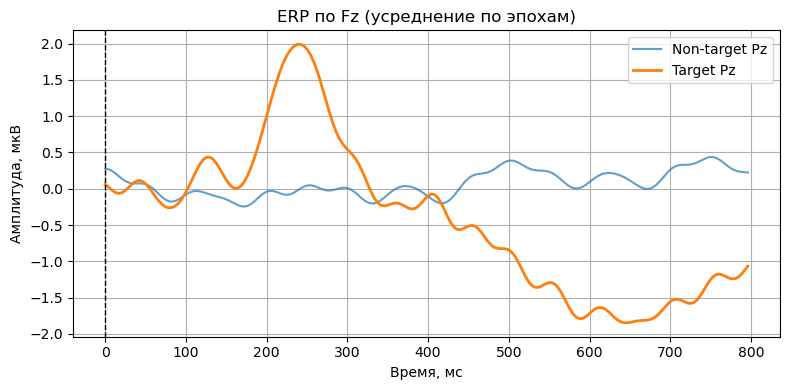

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


print("X_ssl shape:", X_ssl.shape, "dtype:", X_ssl.dtype)
print("y_ssl shape:", y_ssl.shape, "classes:", np.bincount(y_ssl))

CANONICAL_CHANNELS = [
    'Fz', 'Cz', 'Pz', 'Oz',
    'P3', 'P4', 'PO7', 'PO8',
    'F3', 'F4', 'C3', 'C4',
    'CP3', 'CP4'
]

# индекс канала Fz
pz_idx = CANONICAL_CHANNELS.index("Pz")

# делим на таргеты / нетаргеты
X_target = X_ssl[y_ssl == 1]      # (N_t, 14, T)
X_nontarget = X_ssl[y_ssl == 0]   # (N_nt, 14, T)

print("N target:", X_target.shape[0], "N non-target:", X_nontarget.shape[0])

# усредняем по эпохам
erp_fz_target = X_target[:, pz_idx, :].mean(axis=0)      # (T,)
erp_fz_nontarget = X_nontarget[:, pz_idx, :].mean(axis=0)  # (T,)

T = X_ssl.shape[-1]
t = np.linspace(0, 0.8, T, endpoint=False)  # секунды, окно 0–800 мс

# Для наглядности переведём в мкВ
erp_fz_target_uV = erp_fz_target * 1e6
erp_fz_nontarget_uV = erp_fz_nontarget * 1e6

plt.figure(figsize=(8, 4))
plt.plot(t * 1000, erp_fz_nontarget_uV, label="Non-target Pz", alpha=0.7)
plt.plot(t * 1000, erp_fz_target_uV, label="Target Pz", linewidth=2)

plt.axvline(0, color="k", linestyle="--", linewidth=1)
plt.xlabel("Время, мс")
plt.ylabel("Амплитуда, мкВ")
plt.title("ERP по Fz (усреднение по эпохам)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Подготовка данных для SSL

Выборка:

X_ssl_small — формы (N, C, L) (50000, 14, 204).
Сигнал уже отфильтрован band-pass 0.1–20 Hz.

Что нужно сделать для SSL:

- Паддинг:

Сейчас L = 204, можно допадить нулями до L = 208, чтобы L % 16 == 0.

Паддинг можно сделать один раз при загрузке данных.

- Нормализация:

z-score по каналу (на всем SSL-датаcете).
Для этого нужно будет сначала посчитать mean и std по каждому каналу и **сохранить** их. 


In [ ]:
# ==== 1. Импорты и настройки ==== #

import numpy as np
import pandas as pd
from pathlib import Path

# Красивый вывод numpy
np.set_printoptions(precision=6, suppress=True)

# Папка с маленькой SSL-выборкой
DATA_DIR = Path(r"C:\Users\Таисия\Desktop\МФТИ\Диплом_BCI\Выборки\SSL")

DATA_DIR


WindowsPath('C:/Users/Таисия/Desktop/МФТИ/Диплом_BCI/Выборки/SSL')

In [ ]:
# ==== 2. Загрузка маленькой SSL-выборки X, если надо ==== #

X_ssl = np.load(DATA_DIR / "X_ssl_small.npy")
meta_ssl = pd.read_csv(DATA_DIR / "meta_ssl_small.csv")  

print("X_ssl shape:", X_ssl.shape)
print("meta_ssl shape:", meta_ssl.shape)

N, C, L = X_ssl.shape

X_ssl shape: (50000, 14, 204)
meta_ssl shape: (50000, 8)


In [ ]:
# ==== 3. Паддинг до L_padded = 208 ==== #

L_target = 208

def pad_to_length(X, L_target: int):
    """
    X: numpy array формы (N, C, L)
    Возвращает X_padded формы (N, C, L_target),
    дополняя нулями справа по временной оси.
    """
    N, C, L = X.shape
    if L > L_target:
        raise ValueError(f"Текущее L={L} больше целевого L_target={L_target}")
    if L == L_target:
        return X.copy()
    
    pad_width = L_target - L
    # Паддинг по последней оси (time)
    X_padded = np.pad(X, pad_width=((0, 0), (0, 0), (0, pad_width)), mode="constant", constant_values=0.0)
    return X_padded

X_ssl_padded = pad_to_length(X_ssl, L_target)
print("После паддинга:", X_ssl_padded.shape)


После паддинга: (50000, 14, 208)


In [ ]:
# ==== 4. Вычисляем статистики для z-score (по SSL-выборке) ==== #

# Ожидаем X_ssl_padded: (N, C, L_target)
N, C, Lp = X_ssl_padded.shape
print(f"N={N}, C={C}, L_padded={Lp}")

# Среднее и std по всем эпохам и всем точкам времени для КАЖДОГО канала
# axis=(0, 2) → усреднение по N и по времени L, остаётся размерность C
channel_means = X_ssl_padded.mean(axis=(0, 2), keepdims=True)  # (1, C, 1)
channel_stds  = X_ssl_padded.std(axis=(0, 2), keepdims=True)   # (1, C, 1)

print("channel_means shape:", channel_means.shape)
print("channel_stds shape:", channel_stds.shape)

# На всякий случай защищаемся от нулевого std
eps = 1e-6
channel_stds_safe = np.where(channel_stds < eps, eps, channel_stds)

# Немного статистики
print("Пример mean по каналам:", channel_means.flatten()[:5])
print("Пример std по каналам:", channel_stds.flatten()[:5])


N=50000, C=14, L_padded=208
channel_means shape: (1, 14, 1)
channel_stds shape: (1, 14, 1)
Пример mean по каналам: [0.0000000224 0.0000000161 0.000000015  0.0000000122 0.0000000125]
Пример std по каналам: [0.000010859  0.0000094653 0.0000077119 0.0000064354 0.0000080218]


In [ ]:
# ==== 5. Нормализация (z-score по каналам) ==== #

X_ssl_norm = (X_ssl_padded - channel_means) / channel_stds_safe

print("X_ssl_norm shape:", X_ssl_norm.shape)
print("Mean после нормализации (по всем данным):", 
      X_ssl_norm.mean(axis=(0, 2)))
print("Std после нормализации (по всем данным):", 
      X_ssl_norm.std(axis=(0, 2)))


X_ssl_norm shape: (50000, 14, 208)
Mean после нормализации (по всем данным): [ 0.  0. -0. -0. -0. -0. -0.  0.  0.  0.  0. -0.  0. -0.]
Std после нормализации (по всем данным): [0.999996 1.000001 1.       0.999999 0.999997 0.999997 0.999998 1.000002
 1.000001 1.000001 0.999998 1.000002 0.999998 0.999999]


In [ ]:
# ==== 6. Сохраняем нормализованные данные и статистики ==== #

OUT_DIR = DATA_DIR  

np.save(OUT_DIR / "X_ssl_small_norm.npy", X_ssl_norm.astype(np.float32))
np.save(OUT_DIR / "mean_ssl.npy", channel_means.astype(np.float32))
np.save(OUT_DIR / "std_ssl.npy", channel_stds_safe.astype(np.float32))

print("Готово! Данные и статистики сохранены в", OUT_DIR)


Готово! Данные и статистики сохранены в C:\Users\Таисия\Desktop\МФТИ\Диплом_BCI\Выборки\SSL


In [ ]:
# ==== 7. Сохраним всё в архим для Colab ==== # 

import os

SAVE_DIR = r"C:\Users\Таисия\Desktop\МФТИ\Диплом_BCI\Выборки\SSL\ssl_for_colab"  # можешь выбрать любой путь
os.makedirs(SAVE_DIR, exist_ok=True)

# Основные данные в один сжатый npz
np.savez_compressed(
    os.path.join(SAVE_DIR, "ssl_data_50k.npz"),
    X=X_ssl_norm.astype(np.float32),
    mean=channel_means.astype(np.float32),
    std=channel_stds_safe.astype(np.float32),
)

print("Размер npz (МБ):",
      os.path.getsize(os.path.join(SAVE_DIR, "ssl_data_50k.npz")) / 1024**2)

NameError: name 'X_ssl_norm' is not defined